## The Recipe for a Frequented Fast Food Restaurant
There is great variance among the amount of business fast food restaurants consistently experiences. If there are aspects of a neighborhood that can be measured and correlated with a successful location, this would be invaluable information for any prospective franchise owner. We aim now to see if we can discover any such variables from our collected data on Philadelphia neighborhoods and the fast food locations within them.

In [1]:
# required imports for our analysis
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.image as mpimg

# Our previously wrangled dataset on fast food establishments in Philadelphia
ff_cbg_data_unfiltered = pd.read_csv('location_data_wrangled.csv', index_col=0)

In our previously wrangled data by Census Block Group (CBG) we have a large amount of blocks with no recorded fast food establishment. Since our total numbers of fast food consumers are counted from the visits to our recorded establishments, CBGs with no recorded establishments cannot help us discover what would make a CBG attractive to a potential franchise opener. Since this is the interest of our examination, we'll start by cleaning the no franchise CBGs out of our data set before we start.

In [2]:
ff_cbg_data = ff_cbg_data_unfiltered[ff_cbg_data_unfiltered['Fast Food Count'] != 0]

To start in identifying what variables make a CBG the type of place where there are a lot of fast food consumers, we should first confirm our suspicion that the volume of this business type does indeed vary widely by CBG. If there are CBGs that attract an especially large amount of business we'll want to find out what features best correlate with those places.

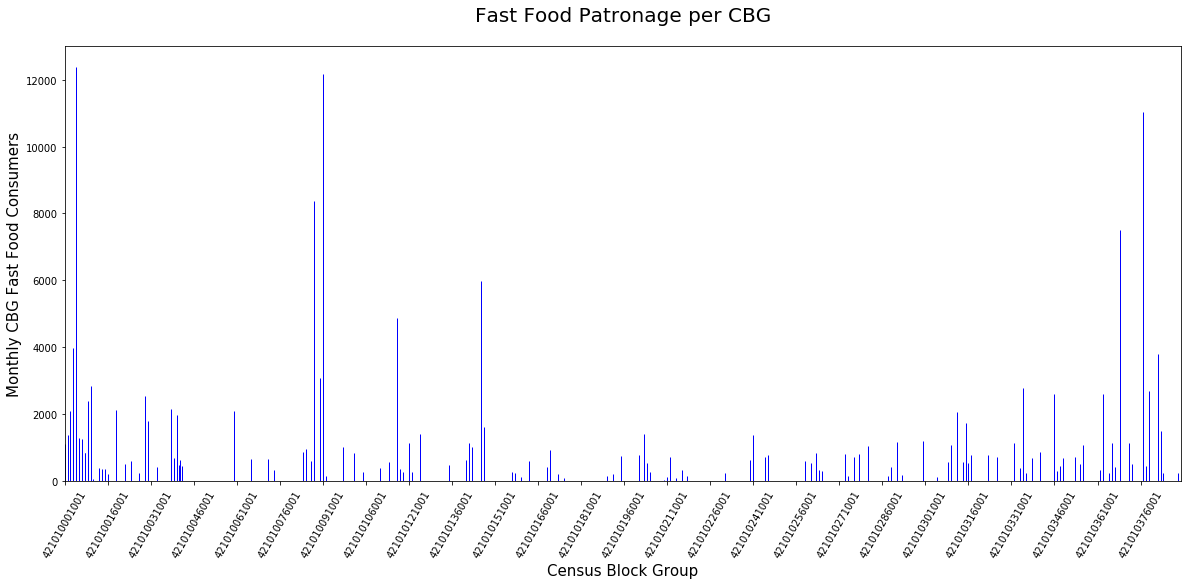

In [3]:
#  Graph business by CBG
fig, ax1 = plt.subplots(figsize=(20,8))

ax1.set_title('Fast Food Patronage per CBG',fontsize=20, pad=25)
ax1.set_ylabel('Monthly CBG Fast Food Consumers', fontsize=15)
ax1.set_xlabel('Census Block Group', fontsize=15)

ax1.ticklabel_format(useOffset=False, style='plain')
ax1.xaxis.set_ticks(np.arange(min(ff_cbg_data.index), max(ff_cbg_data.index), 15000))
plt.xlim((min(ff_cbg_data.index), max(ff_cbg_data.index)))
plt.xticks(rotation=60)

bar = ax1.bar(ff_cbg_data.index, ff_cbg_data['Fast Food Consumers'], linewidth=1)
plt.setp(bar, color='b')
ax1

And we do see, as expected, that there are some definite hot spots for fast food here. In fact:

In [4]:
print('Of {} cbgs we have with recorded fast food locations'.format(
    len(ff_cbg_data)))
print('Only {} of them drive over 4000 consumers a month.'.format(
    len(ff_cbg_data[ff_cbg_data['Fast Food Consumers'] > 4000])))
print("And {} don't even make 2000 consumers a month.".format(
    len(ff_cbg_data[ff_cbg_data['Fast Food Consumers'] < 2000])))

Of 187 cbgs we have with recorded fast food locations
Only 8 of them drive over 4000 consumers a month.
And 159 don't even make 2000 consumers a month.


So our question becomes what makes those eight top census block locations such hot spots. We could reasonably guess that high traffic to the city downtown could drive consumption, but the peaks aren't all clustered in one place even though CBGs are all clustered by areas, so even on this graphic alone we know more than just downtown Philadelphia is experiencing high fast food traffic.

So lets first take a look at these cbg locations on the map of Philadelphia to see what the non downtown areas are. We've brought some infromation on the geography of CBGs (courtesy of Safegraph) into this folder so we can grab the central lat/long of each highly trafficked CBG and put them on a map of Philadelphia.

In [5]:
# Attach lat/long to high traffic CBGs
cbg_lat_long = pd.read_csv('cbg_geographic_data.csv', index_col=0, usecols=[0,3,4])
high_traffic_cbgs = ff_cbg_data[ff_cbg_data['Fast Food Consumers'] > 4000]
high_traffic_cbgs = high_traffic_cbgs.merge(cbg_lat_long, how='left', left_index=True, right_index=True)

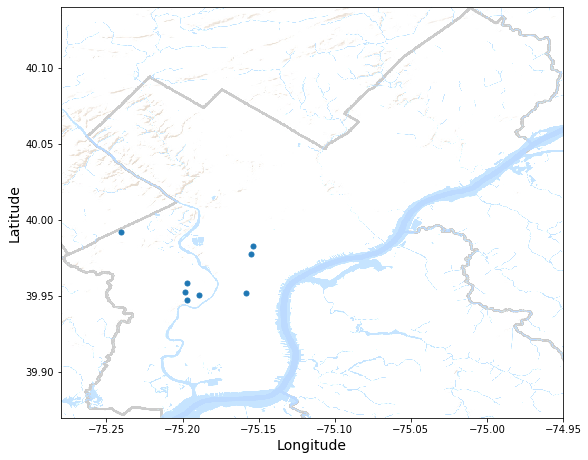

In [6]:
# Plot high traffic CBGs on a map of Philadelphia
philadelphia_img=mpimg.imread('Philadelphia.png')
ax = high_traffic_cbgs.plot(kind="scatter", x="longitude", y="latitude", figsize=(9,10),
                       s=25
                      )
plt.imshow(philadelphia_img, extent=[-75.28, -74.95, 39.87, 40.14], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.show()

And with some familiarity of the layout of Philadelphia, we recognize that there is indeed one central dot representing high traffic in Philadelphia downtown, but then there are also two high traffic CBGs to the North of Downtown which we recognize as being proximal to Temple University and a cluster of four to the West that we recognize as proximal to University of Pennsylvania/Drexel University (University City). There's one more dot further to North West that doesn't have an obvious geographic connection, but from  the locations we do recognize, it seems a good bet that where there is higher education there is higher demand for fast food.

We will see if an examination of the variables backs this up in a moment, but first, since we would most like to know what locations have room for new business, we'll follow this look at total consumers in a Census Block Group with a look at average consumers per business in those groups. If high traffic areas have similar average consumers to low traffic areas, those areas are likely already at capacity for successful franchises.

In [5]:
# First add average patronage to our original dataframe
ff_cbg_data['average_patronage'] = ff_cbg_data['Fast Food Consumers'] / ff_cbg_data['Fast Food Count']

/home/jon-e-pizza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


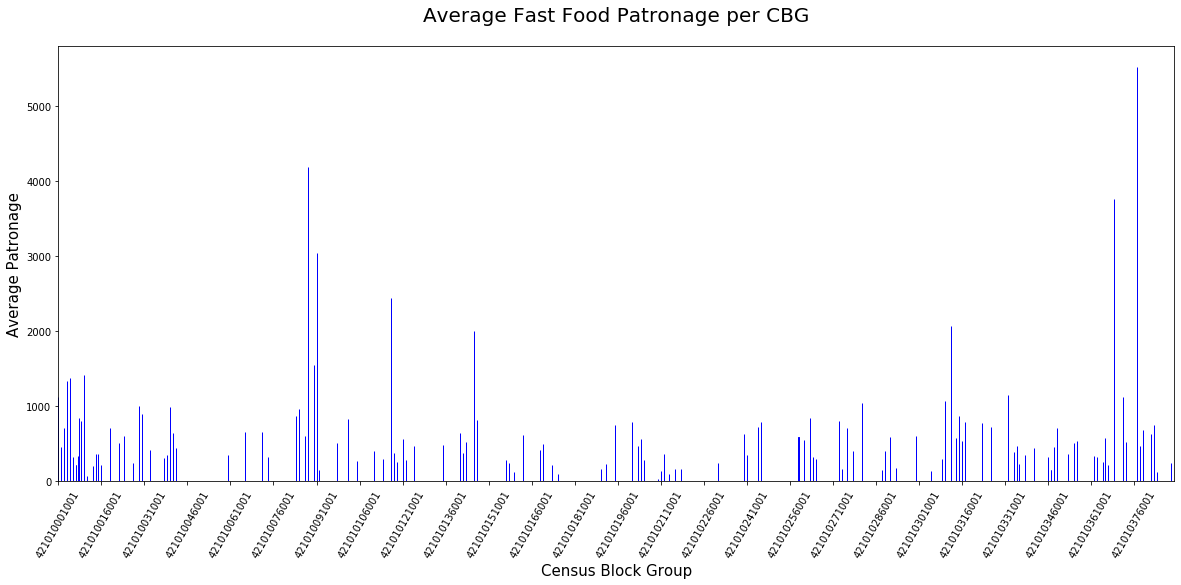

In [8]:
fig, ax1 = plt.subplots(figsize=(20,8))
ax1.set_title('Average Fast Food Patronage per CBG',fontsize=20, pad=25)
ax1.set_ylabel('Average Patronage', fontsize=15)
ax1.set_xlabel('Census Block Group', fontsize=15)
ax1.ticklabel_format(useOffset=False, style='plain')
ax1.xaxis.set_ticks(np.arange(min(ff_cbg_data.index), max(ff_cbg_data.index), 15000))
bar = ax1.bar(ff_cbg_data.index, ff_cbg_data.average_patronage, linewidth=1)
plt.xlim((min(ff_cbg_data.index), max(ff_cbg_data.index)))
plt.xticks(rotation=60)
plt.setp(bar, color='b')
ax1

And we can see that there are still some definite differences in utilization of fast food restaurants per CBG, indicating there is probably business that can be shared. We'll make a rough attempt to identify likely areas where existing business might be acquired by seeing what amount of business the bulk of fast food restaurants survive on, and then identifying what areas have at least that amount of business to spare.

In [9]:
# overview of business patronage
ff_cbg_data.average_patronage.describe()

count     187.000000
mean      582.943309
std       669.564609
min         6.000000
25%       241.000000
50%       409.000000
75%       666.625000
max      5514.500000
Name: average_patronage, dtype: float64

Most restaurants (75 percentile) turn over 667 consumers or fewer per month. We'll use this mark to spot CBGs where the current restaurants are serving at least this much extra over their own customer load of this amount. CBGs with this extra business amount are candidates for new entries. It's worth noting that since we're using current consumer amounts for this number, we still won't be able to identify what areas that currently have no businesses have room for new business, so a mapping of these areas won't include all areas worth an investigation.

In [10]:
# Attach lat/long to CBGs with high average consumer counts
consumer_excess_cbgs = ff_cbg_data[(ff_cbg_data['Fast Food Consumers'] - (ff_cbg_data['Fast Food Count'] * 667)) > 667]
consumer_excess_cbgs = consumer_excess_cbgs.merge(cbg_lat_long, how='left', left_index=True, right_index=True)

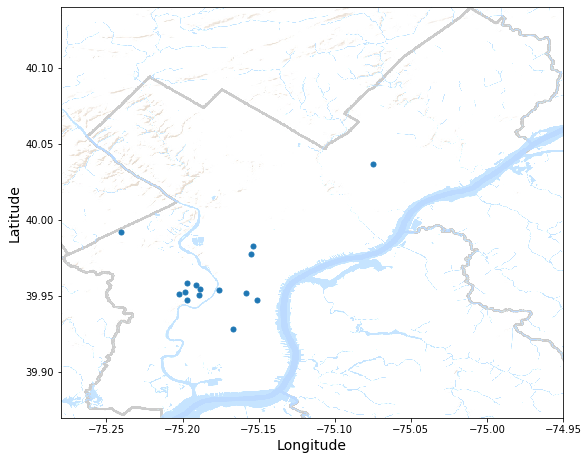

In [11]:
# Plot CBGs with potential sharable business loads on Philadelphia
philadelphia_img=mpimg.imread('Philadelphia.png')
ax = consumer_excess_cbgs.plot(kind="scatter", x="longitude", y="latitude", figsize=(9,10),
                       s=25
                      )
plt.imshow(philadelphia_img, extent=[-75.28, -74.95, 39.87, 40.14], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.show()

Which gives us a hint at a few more areas worth investigating over just how high consumer areas, though we should be careful to note that different areas may also have different business ownership overhead and may actually require higher business numbers than the average.

Having some idea now how demand relates to geographic area, we'd still like to know if measureable features of those areas can predict traffic, since if we discover they can, we can potentially point out areas that there might be room for business where there currently isn't any.

In [12]:
# We start by seeing how each of our values correlates to fast
# food consumer count
columns_to_correlate = list(ff_cbg_data.columns.values)
columns_to_correlate.remove('average_patronage')
columns_to_correlate.remove('Fast Food Count')
ff_cbg_data[columns_to_correlate].corr()['Fast Food Consumers']

Total Population              0.245195
Pop. that Works from Home     0.254979
Single Occupant Households    0.068523
Single Parent Households     -0.189105
Married Parent Households    -0.176664
Undergrads and Grads          0.546434
Diploma/GED attained         -0.080603
Degree attained               0.041006
Households in Poverty        -0.032475
Below 40k Earners             0.011703
40k-100k Earners             -0.084488
Above 100k Earners           -0.000058
Unemployed                    0.020550
Renter Occupied Households    0.100746
Owner Occupied Households    -0.188451
Crime Counts                  0.376914
walk_score                    0.124463
transit_score                 0.343890
Fast Food Consumers           1.000000
raw_visit_count               0.546264
Name: Fast Food Consumers, dtype: float64

And as expected, high undergrad and grad population is the strongest correlation to fast food business in a CBG among our variables. Raw visitor count to that CBG is then a very close second, indicating our assumption that there would be high consumer count downtown was a good one, though transit score is also fairly highly correlated, so it could just mean high visitor count itself is the indicator of fast food demand.

Our next best correlated variables for total consumers is actually crime count with a positive correlation. We should suspect that it is not crime itself that drives consumption, but perhaps some other community metric this count functions as a proxy for, but to decipher those complexities is beyond our scope so we will use this variable as a predictor as is.

Following Crime count are Walk Score's transit score, total population, and total population that works from home. As 'total population' and 'total population that works from home' are very close in correlation measure and indeed sound like they may be more tightly related to each other, we do a sanity check that it's worth considering them seperately checking for strong correlation.

In [268]:
ff_cbg_data[['Total Population', 'Pop. that Works from Home']].corr().loc['Total Population', 'Pop. that Works from Home']

0.43494863683957996

And though they do indeed correlate, at less than .5, it remains worthwhile to consider them as seperate variables.

All other positive correlations are fairly low indicating almost no correlation so we won't give them a further look in our investigation, but we do see a somewhat higher negative correlation with fast food consumers in areas with parents (both together and seperated) and in areas with higher counts of owner occupied housing that we might be interested in comparing.

On each of these identified variables then, we want to see if they're always good indicators of draw of fast food business or lack there of. We'll look at our least trafficked CBGs vs our highest trafficked CBGs on the basis of these variables and see if we can see consistent patterns.

In [13]:
def compare_graph(compare_in_df, comparison_variable, point_of_comparison):
    """Compare the highs and lows of a df column on another column

    Within a provided dataframe, extract the rows with highest and
    lowest values in a specified column, and plot them against
    another specified column which will be on the y axis to see how
    they compare on that variable. All points will be evenly spaced
    horizontally and labeled with their values from the originally
    specified column.
    
    Arguments:
    compare_in_df -- the df we're comparing within
    comparison_variable -- the variable in the df we're comparing on,
                           will be on a central y axis
    point_of_comparison -- the variable to take the highest and lowest
                           valued rows from, values will be the label on
                           each point
    """
    sorted_on = compare_in_df.sort_values(point_of_comparison)
    lows_and_highs = pd.concat([sorted_on.head(7), sorted_on.tail(7)])
    lows_and_highs = lows_and_highs.reset_index()
    fig, ax1 = plt.subplots(figsize=(20,8))
    ax1.set_title(point_of_comparison, fontsize=20)
    ax1.spines['left'].set_position('center')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    plt.axhline(y=2000, color="black", linestyle=(0,[515,50]), alpha=0.5, linewidth=1)
    plt.axhline(y=4000, color="black", linestyle=(0,[515,50]), alpha=0.5, linewidth=1)
    plt.axhline(y=6000, color="black", linestyle=(0,[515,50]), alpha=0.5, linewidth=1)
    plt.axhline(y=8000, color="black", linestyle=(0,[515,50]), alpha=0.5, linewidth=1)
    plt.axhline(y=10000, color="black", linestyle=(0,[515,50]), alpha=0.5, linewidth=1)
    plt.xticks([])
    plt.xlabel(comparison_variable, fontsize=14)
    color_function = lambda x: 'blue' if x < 7 else 'red'
    ax1.scatter(
        lows_and_highs.index, lows_and_highs[comparison_variable],
        s=100, c=lows_and_highs.index.to_series().apply(color_function))
    for i, value in enumerate(lows_and_highs[point_of_comparison].values):
        ax1.annotate(
            value, (i, lows_and_highs.loc[i,comparison_variable]),
            textcoords="offset points", xytext=(6,5))
    ax1

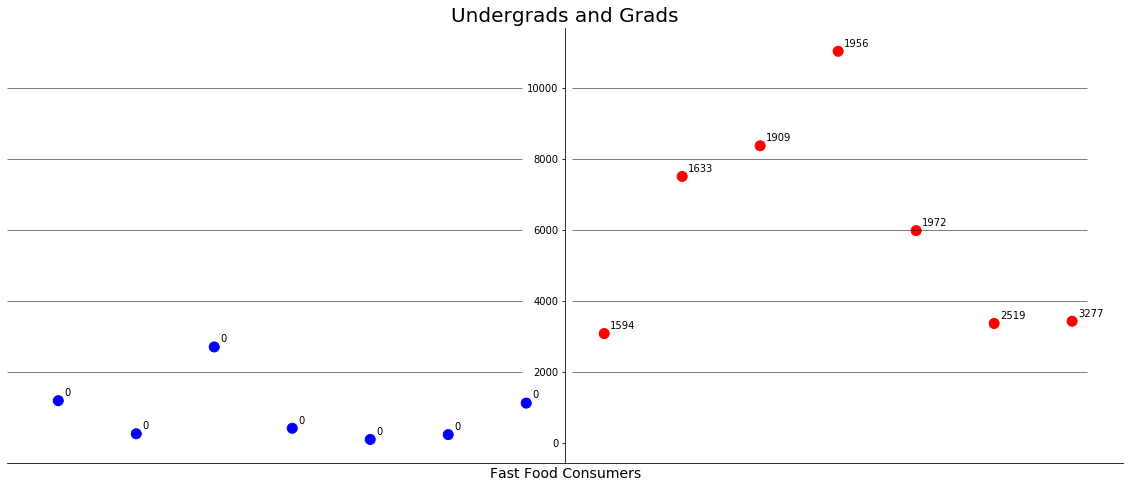

In [270]:
compare_graph(ff_cbg_data, 'Fast Food Consumers', 'Undergrads and Grads')

In this graph we see as the central axis the amount of fast food consumers per CBG per month, and we see each point labeled with the amount of undergrad and grad in that CBG. Overall we can see that the 7 CBGs with the highest amount of undergrads and grads do generally draw greater business then the seven with the lowest amount (tied for 0 students).

We will now generate the same graph for the other variables of interest that we noted. First for our count of raw visits.

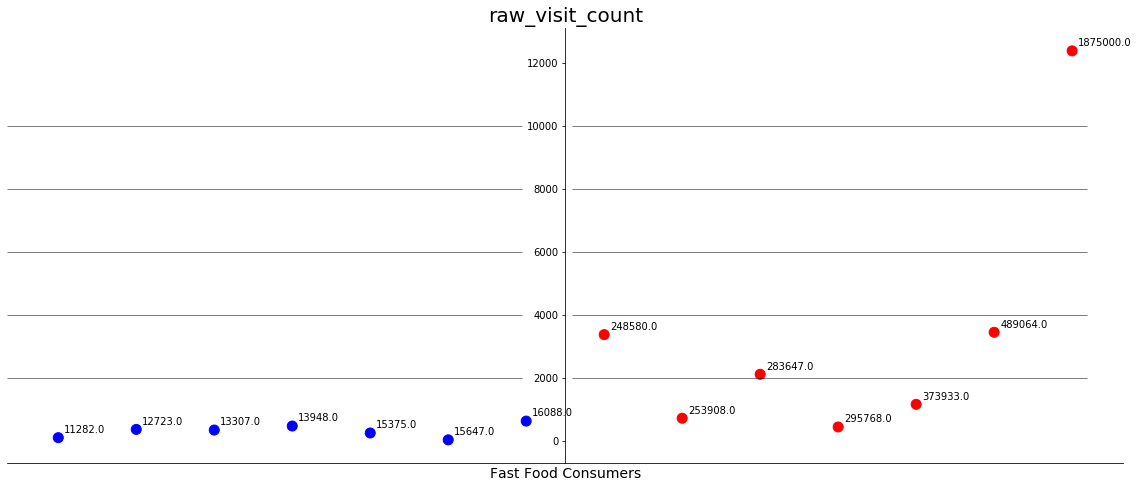

In [271]:
compare_graph(ff_cbg_data, 'Fast Food Consumers', 'raw_visit_count')

Again we generally see more visitors creates more business as expected.

Next for the total population in each CBG.

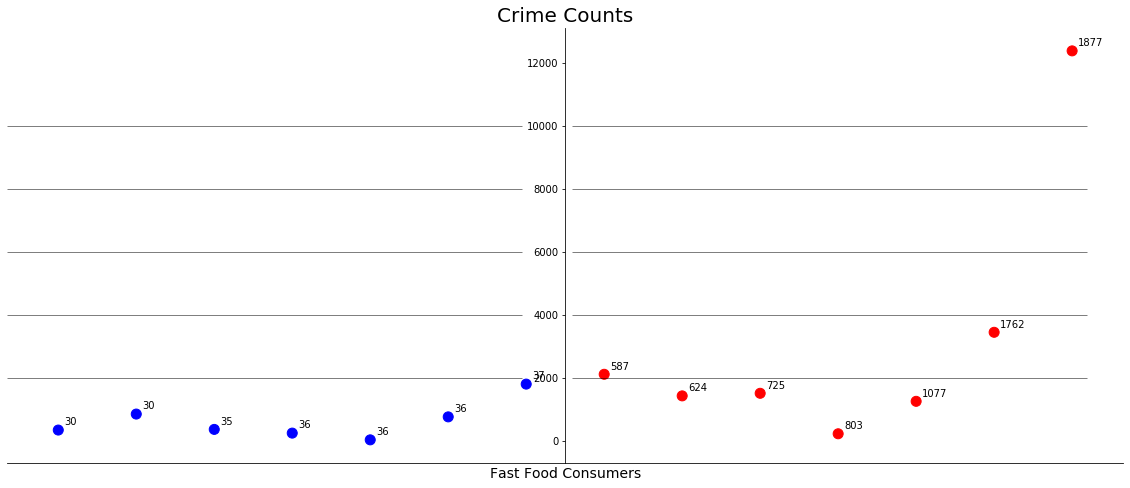

In [14]:
compare_graph(ff_cbg_data, 'Fast Food Consumers', 'Crime Counts')

Perhaps not surprisingly we don't actually see much visual difference for crime between top performers and bottom performers. We should actually go forward assuming little to no correlation here.

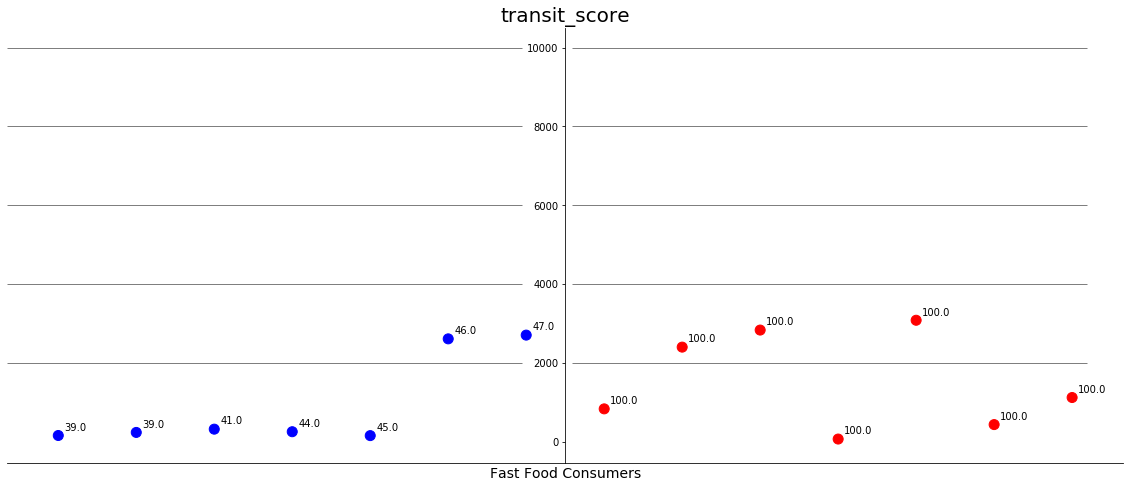

In [15]:
compare_graph(ff_cbg_data, 'Fast Food Consumers', 'transit_score')

There does seem to be a general trend towards higher scores for higher trafficked CBGs.

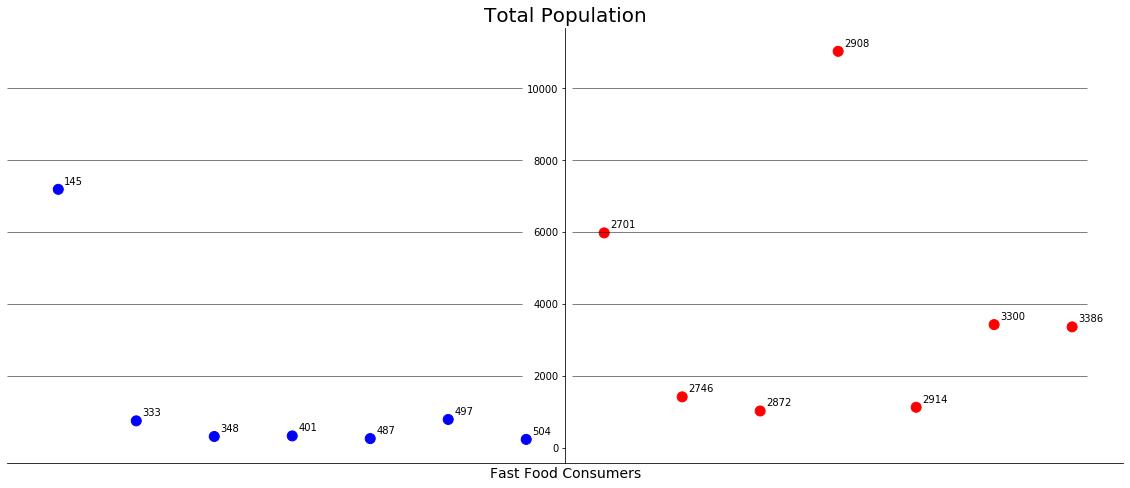

In [272]:
compare_graph(ff_cbg_data, 'Fast Food Consumers', 'Total Population')

And we see this is an indicator for traffic but a weak one, as well as the surprising result that the lowest population CBG actually has significant fast food consumer traffic.

Finally our last positively correlated variable:

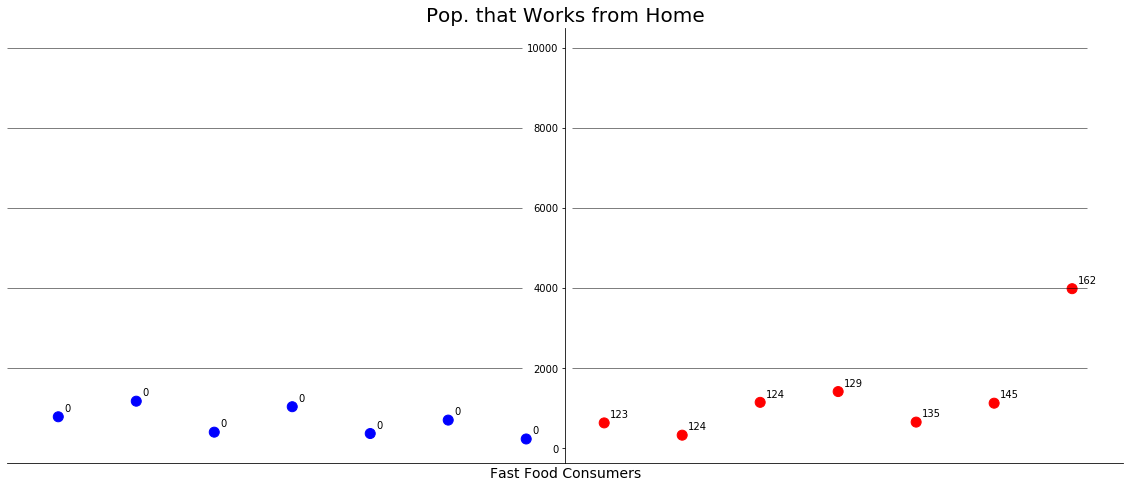

In [273]:
compare_graph(ff_cbg_data, 'Fast Food Consumers', 'Pop. that Works from Home')

Although having the same calculated correlation as total population, a visual examination says that where total population may be some indicator (though a small one) of success, population that works at home is almost a non factor in determining success of fast food in an area.

And now to look at our negatively correlated values, first single parent households

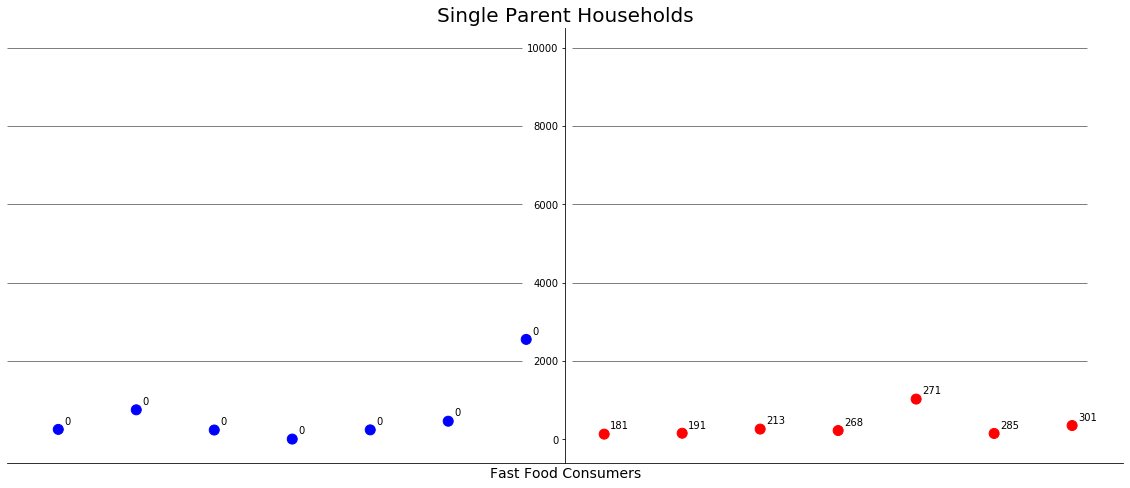

In [274]:
compare_graph(ff_cbg_data, 'Fast Food Consumers', 'Single Parent Households')

This doesn't seem worth considering one way or the other.

Both parent households:

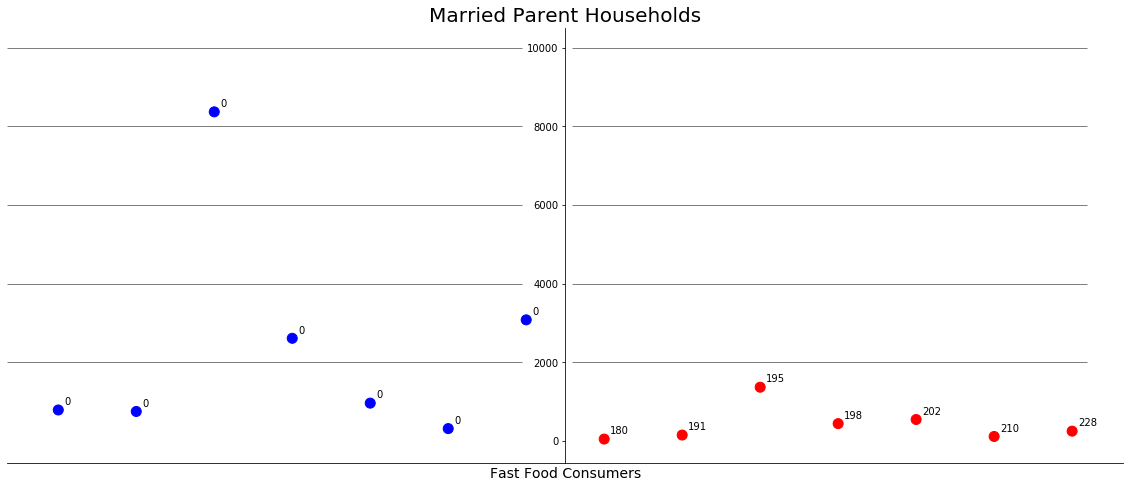

In [275]:
compare_graph(ff_cbg_data, 'Fast Food Consumers', 'Married Parent Households')

Here there does actually seem to be some indication that CBGs with married households generally utilize fast food restaurants less. Finally we check how owner occupied housing affects utilization:

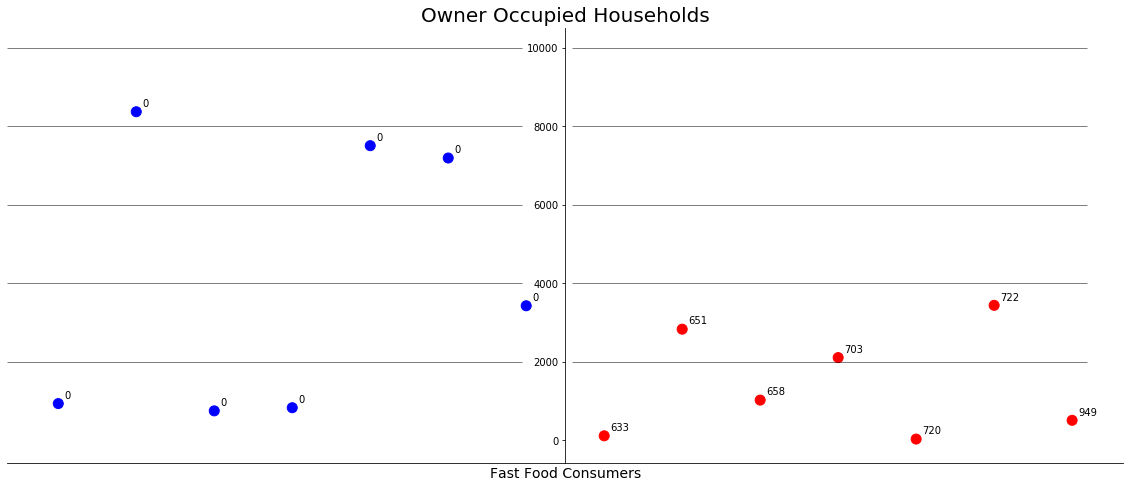

In [276]:
compare_graph(ff_cbg_data, 'Fast Food Consumers', 'Owner Occupied Households')

And we see generally not a great correlation between the two, though it is interesting that some of the CBGs with the highest usage of fast food restaurants seem to have no owner occupied housing.

Overall it seems that if you want to place a fast food restaurant, there's no substitute for following the college students.

Secondary indicators that you might also want to factor into a decision are looking to place in CBGs with higher population and visitor counts and favoring areas with fewer full family households and owner occupied houses.

One other thing that might help us determine what variables best capture demand for fast food is seeing how the top measures in each variable capture market share. For this we need to capture the CBGs in the top percentiles of each category and then correlate them to what total share of the market they have.

In [3]:
total_market = ff_cbg_data['Fast Food Consumers'].sum()

In [8]:
market_portions = {}
cbg_variables = list(ff_cbg_data.columns.values)
cbg_variables.remove('average_patronage')
cbg_variables.remove('Fast Food Count')
for column in cbg_variables:
    top_quintile_mark = ff_cbg_data[column].quantile(.8)
    market_share = ff_cbg_data[ff_cbg_data[column] > top_quintile_mark]['Fast Food Consumers'].sum()
    market_portions[column] = market_share / total_market

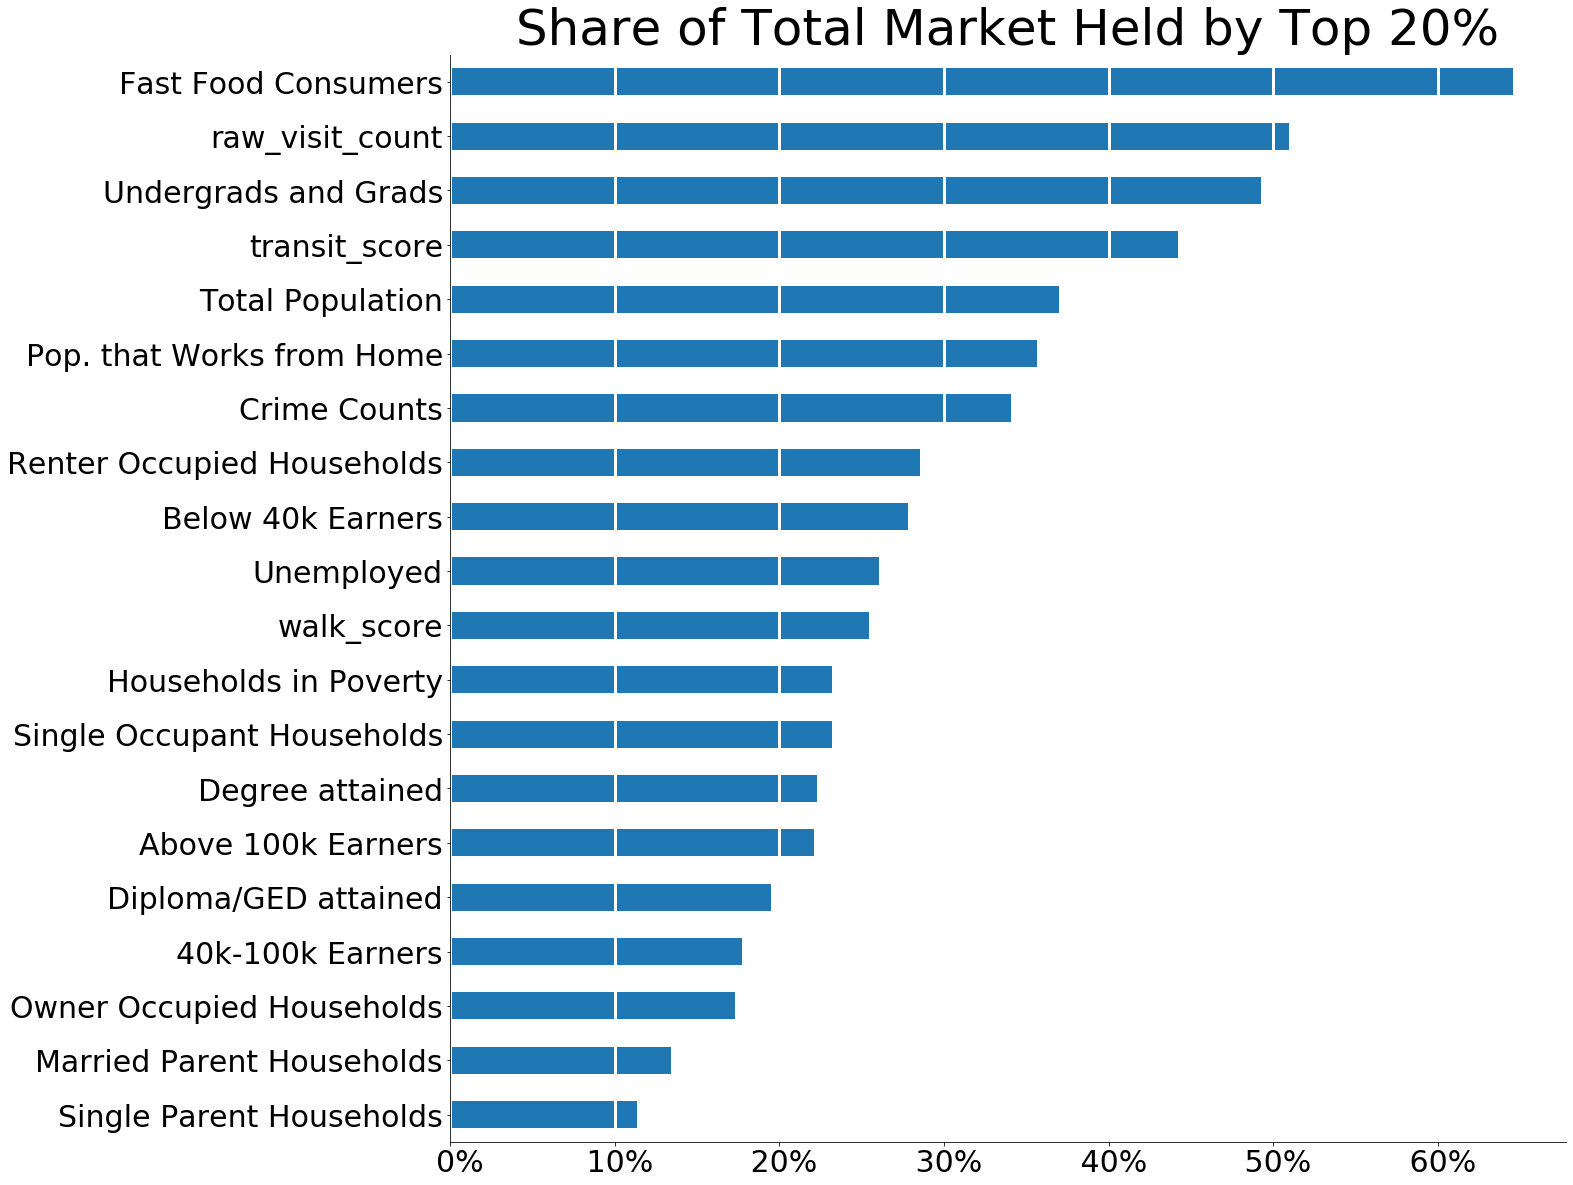

In [9]:
mp = pd.DataFrame.from_dict(market_portions, orient='index', columns=['Market Share'])
mp = mp.sort_values('Market Share')

ax = mp.plot(kind='barh', figsize=(20,20))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_legend().remove()
ax.grid(True, which='major', axis='x', color='white', linewidth=3, zorder=1)

plt.title('Share of Total Market Held by Top 20%', size=50)
plt.tick_params(axis='y', which='major', labelsize=30)
vals = ax.get_xticks()
ax.set_xticklabels(['{:3.0f}%'.format(x * 100) for x in vals])
plt.tick_params(axis='x', which='major', labelsize=30)

ax

And by this summary we see that the top 20% of CBGs for fast food consumers have over half of the total market share for all of Philadelphia, so we know we would want to place in one of those top locations.

Our expectation in pure randomness would be that capturing the top quintile of a variable would result in capturing 20% of total fast food business. Therefore if a variable here has more than 20% market share we want to look to places that rank highly in that variable when placing a restaurant and to avoid places with high measures in variables rank below 20% market share.

This leads us to the already supported conclusion to aim for CBGs with high amount of visitors and higher education students (there is likely to be overlap between these categories) as each capture over 40% of the total market share in their top 20%, and secondarily to aim for high population CBGs. According to this visualization though it seems much more clear that placing in areas with high ranking transit availability is a good idea for fast food success.

The above also suggests avoiding CBGs with high amounts of families as this tends to indicate lower demand.

## Statistical Significance
To add a bit more confidence into how much we can rely on each of our above isolated variables of higher correlation, we can also measure the statistical significance of how these variables differ in our lower and higher trafficked CBGs from the average CBG in our group.

In [19]:
from scipy.stats import brunnermunzel

# first isolate our groups
group_boundaries = np.percentile(ff_cbg_data['Fast Food Consumers'], [10, 90])
low_traffic_cbgs = ff_cbg_data[ff_cbg_data['Fast Food Consumers'] <= group_boundaries[0]]
rm_higher_cbgs = ff_cbg_data[ff_cbg_data['Fast Food Consumers'] > group_boundaries[0]]
high_traffic_cbgs = ff_cbg_data[ff_cbg_data['Fast Food Consumers'] >= group_boundaries[1]]
rm_lower_cbgs = ff_cbg_data[ff_cbg_data['Fast Food Consumers'] < group_boundaries[1]]

def report_significance(variable):
    print("VARIABLE '{}':".format(variable))

    print("HIGH TRAFFIC CBGs")
    print("Mean of {} vs {} for remaining CBGs.".format(np.mean(high_traffic_cbgs[variable]), np.mean(rm_lower_cbgs[variable])))

    pval = brunnermunzel(rm_lower_cbgs[variable], high_traffic_cbgs[variable]).pvalue
    if (pval < 0.05):
        print("\nSIGNIFICANT (p = 0.05)")
    else:
        print("\nNOT SIGNIFICANT (p = 0.05)")
    if (pval < 0.05):
        print("We reject the null hypothesis that variable '{}' isn't different for high traffic CBGs at a p-value of {}".format(variable, pval))
    else:
        print("We fail to reject the null hypothesis that the variable '{}' isn't higher for high traffic CBGs at a p-value of {}".format(variable, pval))

    print("\nVARIABLE '{}':".format(variable))
    print("LOW TRAFFIC CBGs")
    print("Mean of {} vs {} for remaining CBGs.".format(np.mean(low_traffic_cbgs[variable]), np.mean(rm_higher_cbgs[variable])))

    pval = brunnermunzel(rm_higher_cbgs[variable], low_traffic_cbgs[variable]).pvalue
    if (pval < 0.05):
        print("\nSIGNIFICANT (p = 0.05)")
    else:
        print("\nNOT SIGNIFICANT (p = 0.05)")
    if (pval < 0.05):
        print("We reject the null hypothesis that variable '{}' isn't different for low traffic CBGs at a p-value of {}".format(variable, pval))
    else:
        print("We fail to reject the null hypothesis that the variable '{}' isn't lower for low traffic CBGs at a p-value of {}".format(variable, pval))

In [20]:
report_significance('Undergrads and Grads')

VARIABLE 'Undergrads and Grads':
HIGH TRAFFIC CBGs
Mean of 1008.2105263157895 vs 118.79166666666667 for remaining CBGs.

SIGNIFICANT (p = 0.05)
We reject the null hypothesis that variable 'Undergrads and Grads' isn't different for high traffic CBGs at a p-value of 0.0005790708075676942

VARIABLE 'Undergrads and Grads':
LOW TRAFFIC CBGs
Mean of 91.57894736842105 vs 222.45833333333334 for remaining CBGs.

NOT SIGNIFICANT (p = 0.05)
We fail to reject the null hypothesis that the variable 'Undergrads and Grads' isn't lower for low traffic CBGs at a p-value of 0.39024623416292703


In [21]:
report_significance('raw_visit_count')

VARIABLE 'raw_visit_count':
HIGH TRAFFIC CBGs
Mean of 242353.0 vs 62877.244047619046 for remaining CBGs.

SIGNIFICANT (p = 0.05)
We reject the null hypothesis that variable 'raw_visit_count' isn't different for high traffic CBGs at a p-value of 1.944444605328499e-12

VARIABLE 'raw_visit_count':
LOW TRAFFIC CBGs
Mean of 48488.26315789474 vs 84802.42261904762 for remaining CBGs.

NOT SIGNIFICANT (p = 0.05)
We fail to reject the null hypothesis that the variable 'raw_visit_count' isn't lower for low traffic CBGs at a p-value of 0.16040749695035586


In [22]:
report_significance('Crime Counts')

VARIABLE 'Crime Counts':
HIGH TRAFFIC CBGs
Mean of 385.5263157894737 vs 174.8095238095238 for remaining CBGs.

SIGNIFICANT (p = 0.05)
We reject the null hypothesis that variable 'Crime Counts' isn't different for high traffic CBGs at a p-value of 0.00012218824841525588

VARIABLE 'Crime Counts':
LOW TRAFFIC CBGs
Mean of 115.6842105263158 vs 205.32738095238096 for remaining CBGs.

SIGNIFICANT (p = 0.05)
We reject the null hypothesis that variable 'Crime Counts' isn't different for low traffic CBGs at a p-value of 0.020179370968229644


In [23]:
report_significance('transit_score')

VARIABLE 'transit_score':
HIGH TRAFFIC CBGs
Mean of 85.6842105263158 vs 70.24404761904762 for remaining CBGs.

SIGNIFICANT (p = 0.05)
We reject the null hypothesis that variable 'transit_score' isn't different for high traffic CBGs at a p-value of 0.005415885812474208

VARIABLE 'transit_score':
LOW TRAFFIC CBGs
Mean of 66.57894736842105 vs 72.4047619047619 for remaining CBGs.

NOT SIGNIFICANT (p = 0.05)
We fail to reject the null hypothesis that the variable 'transit_score' isn't lower for low traffic CBGs at a p-value of 0.13546910293808667


In [97]:
report_significance('Total Population')

VARIABLE 'Total Population':
HIGH TRAFFIC CBGs
Mean of 1908.0 vs 1301.482142857143 for remaining CBGs.

SIGNIFICANT (p = 0.05)
We reject the null hypothesis that variable 'Total Population' isn't different for high traffic CBGs at a p-value of 0.018996645490224617

VARIABLE 'Total Population':
LOW TRAFFIC CBGs
Mean of 1428.7894736842106 vs 1355.6785714285713 for remaining CBGs.

NOT SIGNIFICANT (p = 0.05)
We fail to reject the null hypothesis that the variable 'Total Population' isn't lower for low traffic CBGs at a p-value of 0.2729805334663915


In [98]:
report_significance('Pop. that Works from Home')

VARIABLE 'Pop. that Works from Home':
HIGH TRAFFIC CBGs
Mean of 50.78947368421053 vs 19.422619047619047 for remaining CBGs.

SIGNIFICANT (p = 0.05)
We reject the null hypothesis that variable 'Pop. that Works from Home' isn't different for high traffic CBGs at a p-value of 0.002088861343763737

VARIABLE 'Pop. that Works from Home':
LOW TRAFFIC CBGs
Mean of 16.157894736842106 vs 23.339285714285715 for remaining CBGs.

NOT SIGNIFICANT (p = 0.05)
We fail to reject the null hypothesis that the variable 'Pop. that Works from Home' isn't lower for low traffic CBGs at a p-value of 0.8229958839122216


In [99]:
report_significance('Single Parent Households')

VARIABLE 'Single Parent Households':
HIGH TRAFFIC CBGs
Mean of 24.526315789473685 vs 62.11904761904762 for remaining CBGs.

SIGNIFICANT (p = 0.05)
We reject the null hypothesis that variable 'Single Parent Households' isn't different for high traffic CBGs at a p-value of 0.0013297907897840992

VARIABLE 'Single Parent Households':
LOW TRAFFIC CBGs
Mean of 61.73684210526316 vs 57.910714285714285 for remaining CBGs.

NOT SIGNIFICANT (p = 0.05)
We fail to reject the null hypothesis that the variable 'Single Parent Households' isn't lower for low traffic CBGs at a p-value of 0.7437252496873357


In [100]:
report_significance('Married Parent Households')

VARIABLE 'Married Parent Households':
HIGH TRAFFIC CBGs
Mean of 31.42105263157895 vs 60.5 for remaining CBGs.

SIGNIFICANT (p = 0.05)
We reject the null hypothesis that variable 'Married Parent Households' isn't different for high traffic CBGs at a p-value of 0.008444648790741865

VARIABLE 'Married Parent Households':
LOW TRAFFIC CBGs
Mean of 84.15789473684211 vs 54.535714285714285 for remaining CBGs.

NOT SIGNIFICANT (p = 0.05)
We fail to reject the null hypothesis that the variable 'Married Parent Households' isn't lower for low traffic CBGs at a p-value of 0.11188897611358595


In [101]:
report_significance('Owner Occupied Households')

VARIABLE 'Owner Occupied Households':
HIGH TRAFFIC CBGs
Mean of 183.42105263157896 vs 257.89285714285717 for remaining CBGs.

NOT SIGNIFICANT (p = 0.05)
We fail to reject the null hypothesis that the variable 'Owner Occupied Households' isn't higher for high traffic CBGs at a p-value of 0.06895840160055312

VARIABLE 'Owner Occupied Households':
LOW TRAFFIC CBGs
Mean of 307.3157894736842 vs 243.88095238095238 for remaining CBGs.

NOT SIGNIFICANT (p = 0.05)
We fail to reject the null hypothesis that the variable 'Owner Occupied Households' isn't lower for low traffic CBGs at a p-value of 0.13795276150500224


### Statistical Analysis Summary
Through our statistical significance analysis we reject the null hypothesis that there isn't a difference between high fast food traffic CBGs and remaining CBGs for every one of our previously isolated measures EXCEPT for owner occupied households which does not register a statistically significant difference.

We fail to reject the null hypothesis that variables are significantly different for low traffic CBGs vs the remaining CBGs for all of our measured variables except strangely enough for counts of crime incidence. It seems ever more clear that we can't use incidence of crime as any sort of numerical indicator for whether we should place a fast food establishment in an area.